# import dataset and library

In [2]:
from google.colab import drive
import os
drive.mount('/content/drive')
os.chdir('/content/drive/MyDrive/dataset')

Mounted at /content/drive


In [45]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import LinearSVR, SVR
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn import metrics

In [4]:
df = pd.read_csv('Life Expectancy Data.csv')

# Data Understanding


In [5]:
df.shape

(2938, 22)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [7]:
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [8]:
df.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


## EDA

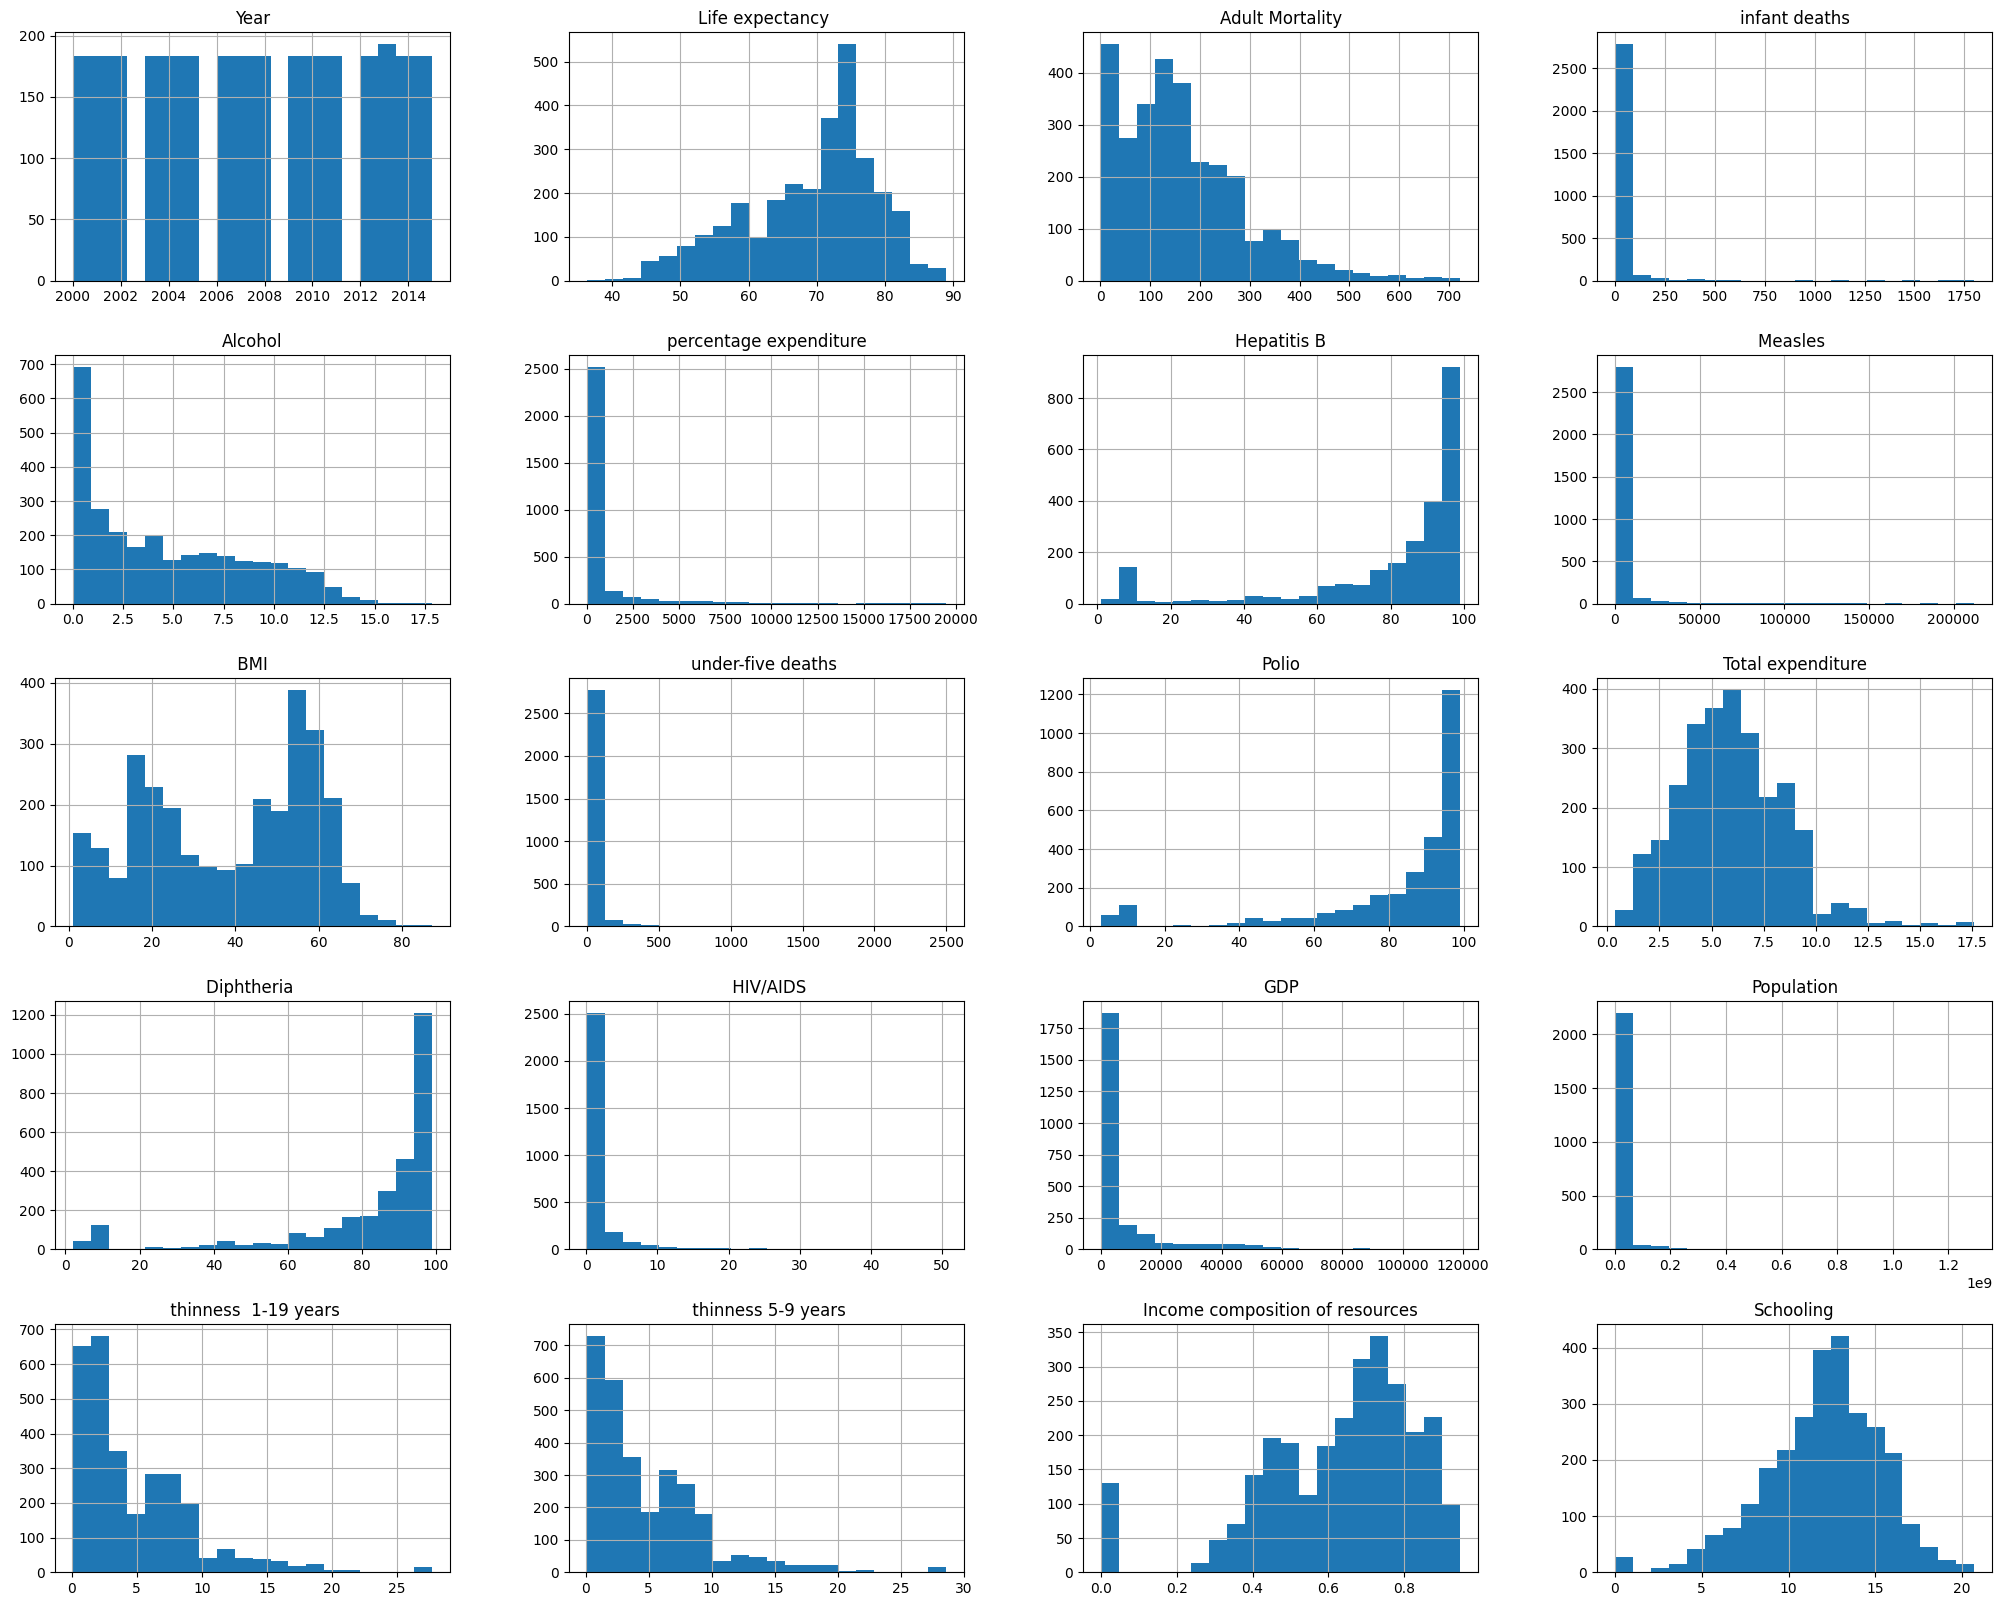

In [9]:
# Data Distribution
df.hist(bins = 20, figsize = (25,20))
plt.show()

<Axes: >

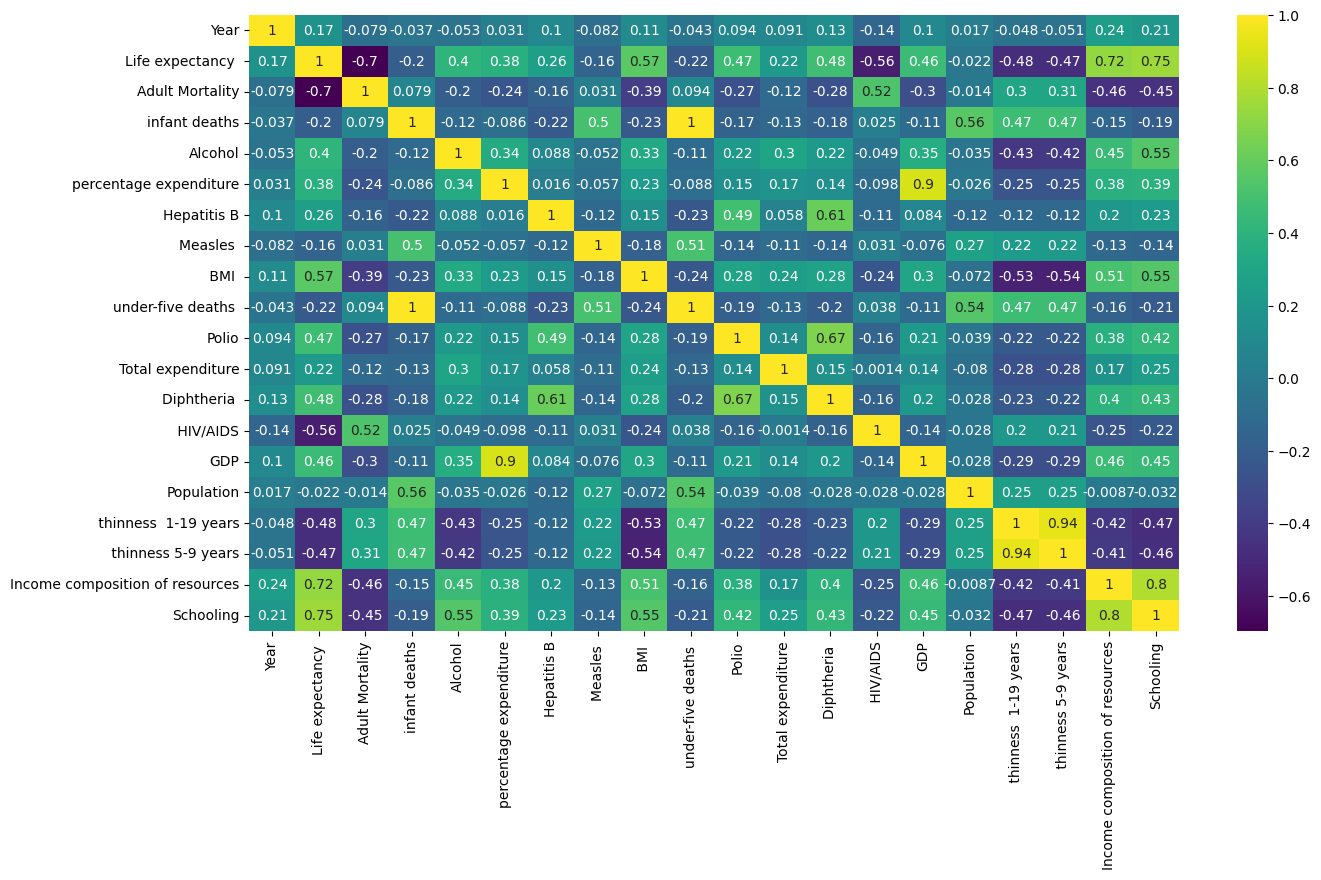

In [10]:
numeric_cols = df.drop(['Country', 'Status'], axis=1)
plt.figure(figsize = (15, 8))
sns.heatmap(numeric_cols.corr(), cmap='viridis', annot=True)

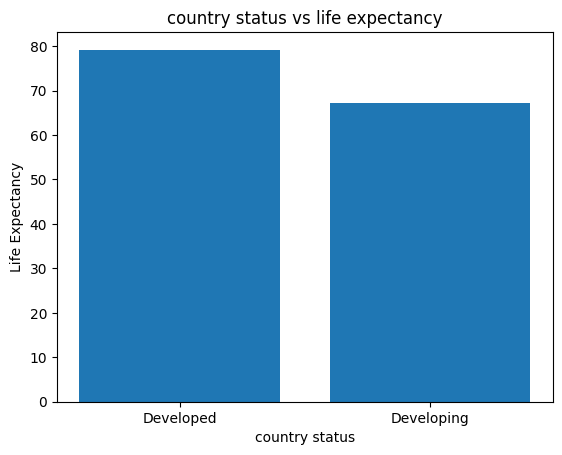

In [11]:
country_group = df.groupby('Status')['Life expectancy '].mean()

plt.bar(x=country_group.index, height=country_group.values)
plt.xlabel('country status')
plt.ylabel('Life Expectancy')
plt.title('country status vs life expectancy')
plt.show()

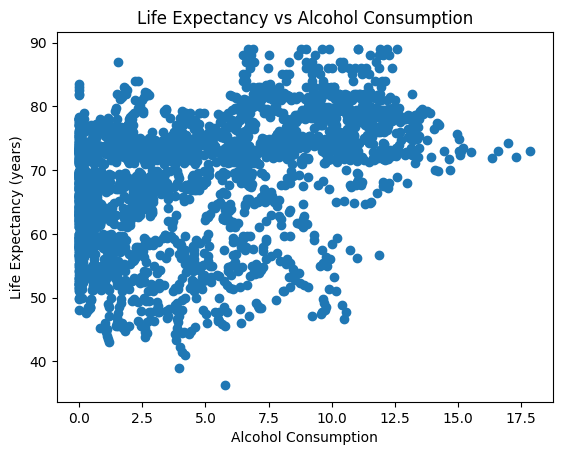

In [12]:
plt.scatter(x=df['Alcohol'], y=df['Life expectancy '])
plt.xlabel('Alcohol Consumption')
plt.ylabel('Life Expectancy (years)')
plt.title('Life Expectancy vs Alcohol Consumption')
plt.show()

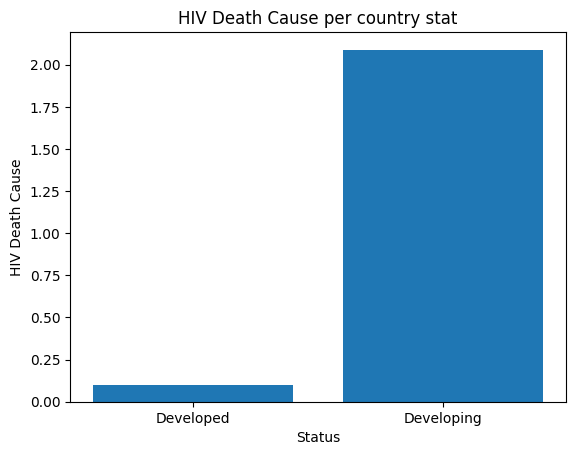

In [13]:
hiv_stat = df.groupby('Status')[' HIV/AIDS'].mean()

plt.bar(x=hiv_stat.index, height=hiv_stat.values)
plt.xlabel('Status')
plt.ylabel('HIV Death Cause')
plt.title('HIV Death Cause per country stat')
plt.show()

# Data Cleaning

## Handling Missing Values

In [14]:
df.isna().sum().sort_values(ascending=False)

,0
Population,652
Hepatitis B,553
GDP,448
Total expenditure,226
Alcohol,194
Income composition of resources,167
Schooling,163
thinness 5-9 years,34
thinness 1-19 years,34
BMI,34


In [15]:
df.columns = df.columns.str.replace(' ', '_')

In [16]:
df.columns

Index(['Country', 'Year', 'Status', 'Life_expectancy_', 'Adult_Mortality',
       'infant_deaths', 'Alcohol', 'percentage_expenditure', 'Hepatitis_B',
       'Measles_', '_BMI_', 'under-five_deaths_', 'Polio', 'Total_expenditure',
       'Diphtheria_', '_HIV/AIDS', 'GDP', 'Population',
       '_thinness__1-19_years', '_thinness_5-9_years',
       'Income_composition_of_resources', 'Schooling'],
      dtype='object')

In [17]:
sps_cols = df[['Diphtheria_', 'Measles_', '_BMI_', '_HIV/AIDS']]

df.rename(columns={col: col.strip().replace('_', '') for col in sps_cols}, inplace=True)

In [18]:
mean_cols = ['Total_expenditure', 'Income_composition_of_resources', 'Schooling', 'BMI', 'Life_expectancy_']
med_cols = ['Population', 'Hepatitis_B', 'GDP', 'Alcohol', '_thinness_5-9_years', '_thinness__1-19_years', 'Polio', 'Diphtheria', 'Adult_Mortality']

mean_imputer = SimpleImputer(strategy='mean')
med_imputer = SimpleImputer(strategy='median')

df[mean_cols] = mean_imputer.fit_transform(df[mean_cols])
df[med_cols] = med_imputer.fit_transform(df[med_cols])

In [19]:
df.isna().sum().sort_values(ascending=False)

,0
Country,0
Year,0
Income_composition_of_resources,0
_thinness_5-9_years,0
_thinness__1-19_years,0
Population,0
GDP,0
HIV/AIDS,0
Diphtheria,0
Total_expenditure,0


## Data Encoding and Scalling


In [20]:
obj_cols = ['Country', 'Status']

label_encoder_df = LabelEncoder()
for col in obj_cols:
    df[col] = label_encoder_df.fit_transform(df[col])

In [25]:
df.Country.unique()

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  44,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,
        38,  39,  40,  41,  42,  43,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [33]:
cols_to_scale = ['Country', 'Year', 'Adult_Mortality',
       'infant_deaths', 'Alcohol', 'percentage_expenditure', 'Hepatitis_B',
       'Measles', 'BMI', 'under-five_deaths_', 'Polio', 'Total_expenditure',
       'Diphtheria', 'HIV/AIDS', 'GDP', 'Population',
       '_thinness__1-19_years', '_thinness_5-9_years',
       'Income_composition_of_resources', 'Schooling']

scaler = MinMaxScaler()
df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])

# Modelling

In [38]:
X = df.drop('Life_expectancy_', axis=1)
y = df['Life_expectancy_']

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [41]:
linear_svr = {'epsilon': 0.1, 'max_iter': 100, 'tol': 0.001}
tree_param = {'criterion': 'squared_error', 'max_depth': 16, 'min_samples_leaf': 5, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0}

In [42]:
linreg = LinearRegression()
linearsvr = LinearSVR(**linear_svr, random_state=42, dual=False, loss='squared_epsilon_insensitive', C=1)
tree_tuned = DecisionTreeRegressor(random_state=42, **tree_param)
random_forest = RandomForestRegressor(random_state=42, **tree_param)
ridge = Ridge(max_iter=1000 ,random_state=42)
lasso = Lasso(random_state=42)
elastic = ElasticNet(random_state=42)
xgboost = XGBRegressor(random_state=42)
lgbm = LGBMRegressor(random_state=42)



model_pipeline = [linreg, tree_tuned, linearsvr, random_forest, ridge, lasso, elastic, xgboost, lgbm]
model_list = ['Linear Regression', 'Decision Tree', 'SVM', 'Random Forest', 'Ridge Regression', 'Lasso Regression', 'ElasticNet', 'xgboost', 'lgbm']

In [43]:
def modelselect():
    r2score = []
    mae = []
    mse = []
    rmse = 0
    for model in model_pipeline:
      model.fit(X_train, y_train)
      y_pred = model.predict(X_test)
      r2score.append(metrics.r2_score(y_test, y_pred))
      mae.append(metrics.mean_absolute_error(y_test, y_pred))
      mse.append(metrics.mean_squared_error(y_test, y_pred))
      rmse = np.sqrt(mse)
    result_df = pd.DataFrame({'Model' : model_list, 'R2 Score' : r2score, 'MAE' : mae, 'MSE' : mse, 'RMSE' : rmse})
    result_df = result_df.sort_values(by='R2 Score', ascending=False)
    return result_df

In [44]:
result = modelselect()
result

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001013 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3525
[LightGBM] [Info] Number of data points in the train set: 2350, number of used features: 21
[LightGBM] [Info] Start training from score 69.276978


,Model,R2 Score,MAE,MSE,RMSE
8,lgbm,0.968380,1.090320,2.739368,1.655104
7,xgboost,0.967683,1.117992,2.799759,1.673248
3,Random Forest,0.964425,1.145633,3.082069,1.755582
1,Decision Tree,0.937335,1.550372,5.428992,2.330020
0,Linear Regression,0.826806,2.842186,15.004705,3.873591
2,SVM,0.816099,2.930848,15.932318,3.991531
4,Ridge Regression,0.814593,2.934514,16.062747,4.007836
5,Lasso Regression,0.283642,6.405522,62.061860,7.877935
6,ElasticNet,0.215637,6.728524,67.953499,8.243391
